In [1]:
file_path='/content/drive/MyDrive/colab_datasets/LP3-pratical-datasets/prac9/archive (4).zip'
from zipfile import ZipFile
with ZipFile(file_path,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [3]:
import pandas as pd

df = pd.read_csv('/content/sales_data_sample.csv', encoding='latin1')
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [6]:
df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [7]:
df = df[['QUANTITYORDERED','PRICEEACH','SALES','MSRP','QTR_ID','MONTH_ID','YEAR_ID']]
df.isnull().sum()

,0
QUANTITYORDERED,0
PRICEEACH,0
SALES,0
MSRP,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


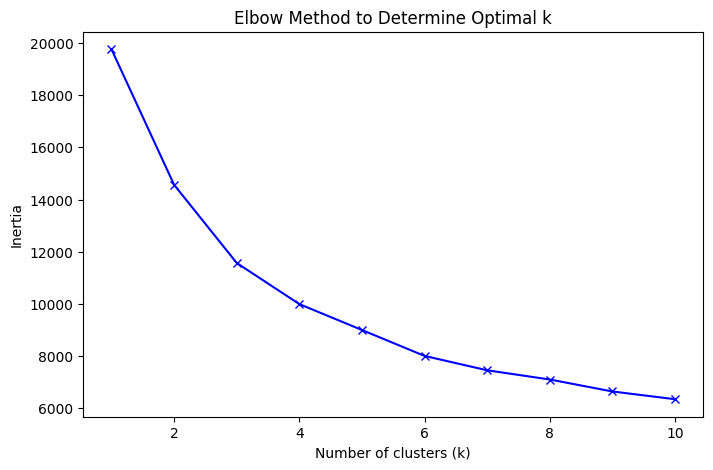

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


Looking at your graph 👇

The inertia (within-cluster sum of squares) decreases sharply up to around k = 3 or 4,

After k = 4, the curve starts to flatten out — meaning that adding more clusters doesn’t significantly reduce inertia.

✅ Optimal number of clusters (k) = 4

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [11]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


         QUANTITYORDERED  PRICEEACH        SALES        MSRP    QTR_ID  \
Cluster                                                                  
0              32.297496  73.190839  2373.416583   78.812960  1.430044   
1              35.089677  97.915693  4430.299812  123.934307  3.643379   
2              33.582111  63.108548  2099.501686   66.873900  3.611437   
3              40.920477  98.469801  5448.432048  131.898608  1.479125   

         MONTH_ID      YEAR_ID  
Cluster                         
0        3.197349  2004.184094  
1        9.870699  2003.526590  
2        9.809384  2003.542522  
3        3.369781  2004.236581  


🧩 What the table shows:

Each row (Cluster 0–3) represents one of the 4 clusters found by K-Means.

Each column shows the average value of that feature within that cluster.
For example, for Cluster 0:

Average QUANTITYORDERED ≈ 32.3

Average PRICEEACH ≈ 73.19

Average SALES ≈ 2373.4

Average MSRP ≈ 78.8

Average QTR_ID ≈ 1.43 → means most orders fall in Q1

Average MONTH_ID ≈ 3.19 → mostly around March

Average YEAR_ID ≈ 2004.18 → mainly from 2004

📊 Interpretation of Each Cluster:
Cluster	Description
Cluster 0	🔹 Low to mid-range sales and price (SALES ≈ 2373, PRICEEACH ≈ 73).
🔹 Mostly from early 2004 (Month ≈ 3, Q1).
Cluster 1	🔹 High-value transactions (SALES ≈ 4430, PRICEEACH ≈ 97.9).
🔹 Mostly from late 2003 (Month ≈ 9, Q3).
Cluster 2	🔹 Lower sales and prices (SALES ≈ 2099, PRICEEACH ≈ 63).
🔹 Also around late 2003 (Month ≈ 9–10).
Cluster 3	🔹 Highest sales and prices (SALES ≈ 5448, PRICEEACH ≈ 98).
🔹 Mostly from early 2004 (Month ≈ 3, Q1).
🧠 Insights:

You can see two time-based groupings:

Clusters 1 & 2 → mostly 2003 (Q3–Q4)

Clusters 0 & 3 → mostly 2004 (Q1)

Cluster 3 looks like premium sales (high price & sales amount).

Cluster 2 represents low-value sales, possibly smaller transactions.

Cluster 0 might be regular or bulk low-price orders.

Cluster 1 shows moderate–high-value sales in later months.

🧾 Conclusion:

Your clustering has successfully grouped customers/orders into 4 segments based on their sales behavior and pricing patterns.
These clusters can now be used to:

Target specific sales groups,

Identify seasonal trends,

Understand high-value customers, etc.